In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

In [3]:
mdata= pd.read_csv('/Users/student/Documents/GitHub/AML_project/datasets/train_imperson_without4n7_balanced_data.csv')
mdata_test= pd.read_csv('/Users/student/Documents/GitHub/AML_project/datasets/test_imperson_without4n7_balanced_data.csv')
Xtest, Ytest = mdata_test.loc[:, mdata_test.columns != '155'], mdata_test['155']

In [4]:
mdata.head()

,1,2,3,5,6,8,9,10,11,12,...,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0


In [5]:

#investigating presence of missing data

mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97044 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 113.3 MB


In [6]:
#data is complete

m1= mdata.dropna()
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97044 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 114.0 MB


In [7]:
#investigating presence of duplicate values
#is this because Dr Yoo rebalanced the classes with some form of bootstrapping? Hence we leave them in?
#I think we should assume data are iid anyway, hence keep duplicates
#if later we can see that the model does nt generalize well we can go back and eliminate them.


m2 = mdata.drop_duplicates()
m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96497 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 113.4 MB


In [8]:
#duplicate rows for reference

mdata[mdata.duplicated() == True].head()

,1,2,3,5,6,8,9,10,11,12,...,146,147,148,149,150,151,152,153,154,155
307,0,0,0,0.000017,0.000017,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
772,0,0,0,0.000011,0.000011,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
1565,0,0,0,0.000014,0.000014,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
7708,0,0,0,0.000037,0.000037,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
13105,0,0,0,0.000011,0.000011,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0


In [8]:
mdata.describe().T.describe()

,count,mean,std,min,25%,50%,75%,max
count,153.0,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,97044.0,0.150720,0.058346,0.016340,0.111776,0.144825,0.170367,0.442533
std,0.0,0.315662,0.124710,0.120557,0.301584,0.334706,0.357250,0.482821
min,97044.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97044.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97044.0,0.000008,0.000004,0.000000,0.000000,0.000000,0.000000,0.001530
75%,97044.0,0.037225,0.017885,0.000000,0.000000,0.000000,0.002253,1.000000
max,97044.0,1.000000,0.500003,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#separate X and Y

X, Y = mdata.loc[:, mdata.columns != '155'], mdata['155']

In [10]:
X.head()

,1,2,3,5,6,8,9,10,11,12,...,145,146,147,148,149,150,151,152,153,154
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


In [11]:
X.std().value_counts()

0.000000    74
0.014709    11
0.354444     2
0.003210     2
0.062765     2
            ..
0.002451     1
0.024858     1
0.010997     1
0.032883     1
0.224398     1
Length: 65, dtype: int64

In [10]:
#eliminate features with 0 standard deviation
#Xselected with 0 var taken out
from sklearn.feature_selection import VarianceThreshold




selector = VarianceThreshold()

X5=selector.fit(X)
col = X.columns[selector.get_support()]
Xselected= X.loc[:, col ]

In [14]:
Xselected.head()

,5,6,8,9,14,15,16,18,20,26,...,133,138,140,141,142,143,144,145,146,154
0,0.000066,0.000066,0.009150,0.009150,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000014,0.000014,0.000000,0.000000,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035528,0.035528,0.070588,0.070588,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005128,0.005128,0.094771,0.094771,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035116,0.035116,0.070588,0.070588,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
Xselected.shape

(97044, 78)

In [49]:
Xselected['14'].describe()

count    97044.000000
mean         0.999784
std          0.014709
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: 14, dtype: float64

In [18]:
#example of square root transform

xsqrt = np.sqrt(Xselected['5'])

In [19]:
xsqrt.skew()

3.7898261887995903

In [9]:
import matplotlib as plt
%matplotlib inline

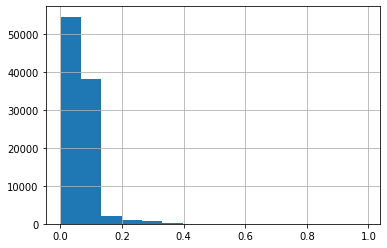

In [22]:
#histogran after the sqrt transformation

np.sqrt(Xselected['5']).hist(bins = 15)

In [63]:
#Normalizer transform norm 1

from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(Xselected)
normalizedX2 = scaler.transform(Xselected)

In [64]:
#normalised range 0 1


from sklearn.preprocessing import MinMaxScaler



scaler1 = MinMaxScaler().fit(Xselected)
scaled0_1=scaler1.transform(Xselected)



In [65]:
#Power and quantile transform. THe latter distorts correlation, hence try the former

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson').fit(Xselected)
poweredX2 = pt.transform(Xselected)


//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [66]:
#datframe wiht norm 1

NX2df = pd.DataFrame(normalizedX2, columns = Xselected.columns)

NX2df.head()

,5,6,8,9,14,15,16,18,20,26,...,133,138,140,141,142,143,144,145,146,154
0,0.000015,0.000015,0.002125,0.002125,0.232240,0.232240,0.232240,0.232240,0.232240,0.232240,...,0.0,0.116120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000004,0.000004,0.000000,0.000000,0.252240,0.252240,0.252240,0.252240,0.252240,0.252240,...,0.0,0.126120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008282,0.008282,0.016454,0.016454,0.233105,0.233105,0.233105,0.233105,0.233105,0.233105,...,0.0,0.116553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001145,0.001145,0.021168,0.021168,0.223356,0.223356,0.223356,0.223356,0.223356,0.223356,...,0.0,0.111678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.008178,0.008178,0.016439,0.016439,0.232884,0.232884,0.232884,0.232884,0.232884,0.232884,...,0.0,0.116442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
np.median(NX2df.skew())

3.8196847568828263

In [68]:
#dataframe powered gaussian 

PX2df = pd.DataFrame(poweredX2, columns= Xselected.columns)

PX2df.head()


,5,6,8,9,14,15,16,18,20,26,...,133,138,140,141,142,143,144,145,146,154
0,-1.527311,-1.527311,-0.883721,-0.883721,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,-0.00321,0.0,-1.151287,-0.105837,-1.165737,-0.105657,-0.028724,-0.45347,-0.45347,-0.788655
1,-1.553062,-1.553062,-1.090489,-1.090489,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,-0.00321,0.0,-1.151287,-0.105837,-1.165737,-0.105657,-0.028724,-0.45347,-0.45347,-0.788655
2,2.623799,2.623799,0.166931,0.166931,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,-0.00321,0.0,-1.151287,-0.105837,-1.165737,-0.105657,-0.028724,-0.45347,-0.45347,-0.788655
3,0.371013,0.371013,0.458800,0.458800,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,-0.00321,0.0,-1.151287,-0.105837,-1.165737,-0.105657,-0.028724,-0.45347,-0.45347,-0.788655
4,2.620509,2.620509,0.166931,0.166931,0.014712,0.014712,0.014712,0.014712,0.014712,0.014712,...,-0.00321,0.0,-1.151287,-0.105837,-1.165737,-0.105657,-0.028724,-0.45347,-0.45347,-0.788655


In [69]:
# dataframe normalised range 0_1

NX3df = pd.DataFrame(scaled0_1, columns= Xselected.columns)
NX3df.head()

,5,6,8,9,14,15,16,18,20,26,...,133,138,140,141,142,143,144,145,146,154
0,0.000064,0.000064,0.009150,0.009150,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000012,0.000012,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.036308,0.036308,0.070588,0.070588,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005238,0.005238,0.094771,0.094771,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035887,0.035887,0.070588,0.070588,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
PX2df.skew()

5       0.635083
6       0.635083
8       1.259153
9       1.259153
14    -67.957971
         ...    
143     9.370956
144    34.786323
145     1.751773
146     1.751773
154     1.512698
Length: 78, dtype: float64

In [18]:
np.median(PX2df.skew())

2.899257065741918

In [19]:
norm_only = pd.DataFrame(normalizedX2, columns = Xselected.columns)
Y.columns=['Y']

norm_only=norm_only.join(Y)

norm_csv = norm_only.to_csv (r'C:\Users\Student\Git\AML_project\datasets\norm_csv1.csv')

In [16]:
from sklearn.ensemble import ExtraTreesClassifier 

model=ExtraTreesClassifier()
model.fit(normalizedX2,Y)
print(model.feature_importances_)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.46683053e-04 1.44753111e-04 2.57087328e-02 6.20081364e-03
 7.17922335e-03 2.60043088e-02 7.96187770e-04 1.22918757e-02
 2.86929585e-03 1.94407622e-02 4.85890449e-03 7.93487806e-03
 3.82301415e-03 5.76690694e-02 3.95067171e-03 8.53429604e-02
 4.26760771e-02 3.93406707e-03 4.38108764e-03 3.97311300e-03
 4.71238906e-02 6.84741780e-02 1.14873360e-01 6.78534966e-02
 6.65023685e-04 1.21909400e-02 3.47496423e-05 7.21235581e-02
 1.17656527e-03 3.95934579e-04 1.86538298e-02 7.44230914e-04
 1.18163921e-02 1.13073524e-03 1.03725265e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.63329746e-02
 1.69789347e-02 2.88547070e-03 9.19741024e-03 0.00000000e+00
 4.72784712e-03 1.01329808e-04 3.09138123e-06 1.27258402e-04
 8.20241353e-03 6.02941482e-03 9.29440280e-04 8.03445987e-03
 2.14346358e-04 3.03964968e-04 0.00000000e+00 0.00000000e+00
 9.98503969e-05 8.67584619e-04 1.28718949e-04 8.00554770e-04
 1.38317759e-02 1.51326354e-07 1.47552776e-06 2.25664151e-03
 6.45583634e-04 1.362219

In [17]:
sorted((importance, col) for (col, importance) in enumerate(model.feature_importances_))[-20:]


[(0.01219093996790909, 25),
 (0.01229187571957056, 7),
 (0.013777081575558207, 72),
 (0.013831775934003145, 60),
 (0.015929931782349038, 71),
 (0.01697893468462412, 40),
 (0.018653829842577668, 30),
 (0.019440762208037015, 9),
 (0.0257087328408758, 2),
 (0.026004308777175914, 5),
 (0.026332974565077435, 39),
 (0.04267607710097668, 16),
 (0.047123890559416924, 20),
 (0.0576690694150867, 13),
 (0.06785349655130682, 23),
 (0.0684741779541135, 21),
 (0.07212355807733804, 27),
 (0.08534296040393936, 15),
 (0.10372526535181413, 34),
 (0.11487335975530161, 22)]

In [46]:
norm_only.columns[25]

'71'

# Datasets

Reduced dataset (down to 78 features) by removing zero variance features - dataset 1

- Xselected

Dataset 1 + normalised the dataset by rescaling each row to add up to length one - dataset 2

- NX2df

Dataset 1 + rescaling each feature between 0 to 1 - dataset 3

- NX3df 

Dataset 1 + transform the datset to be gaussian like (mean=0 abd s.d=1) - dataset 4

- PX2df

# CatBoost & XgBoost classifier with Kbest feature selection on dataset 1

In [18]:
import numpy as np
import scipy
import pandas as pd
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_validate
from numpy import random, arange
from xgboost import XGBClassifier

In [164]:
Xtrain, Ytrain = Xselected, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score')) 

   feature         Score
25      71  32124.682195
16      51  28936.000138
22      67  28321.490224
13      47  24346.021809
77     154  13311.733744
15      50  12317.666392
2        8  12076.290588
3        9  12076.290588
23      68   7911.296191
34      82   7720.479234


In [166]:
selected_features = set((25,16,22,13,77,15,2,3,23,34))
import numpy 
X_top_features = Xselected.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

# Catboost classifier

In [167]:
indexes =  arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

cb = CatBoostClassifier(verbose=False, early_stopping_rounds=50)
cb_cv = cross_validate(cb, X_cv, Y_cv, cv=5, scoring="accuracy")
cb_cv

{'fit_time': array([16.88924599, 18.57903004, 19.61032724, 16.98861003, 17.83964992]),
 'score_time': array([0.01466632, 0.0195148 , 0.01424694, 0.01427627, 0.0139029 ]),
 'test_score': array([0.99953632, 0.9994848 , 0.99963932, 0.99948475, 0.99969085])}

# XgBoost Classifier

In [168]:
gb = XGBClassifier(verbosity=0)
gb_cv = cross_validate(gb, X_cv, Y_cv, cv=5, scoring="accuracy")
gb_cv

{'fit_time': array([2.38882828, 2.80635309, 2.65520096, 2.61705399, 2.46459889]),
 'score_time': array([0.0297358 , 0.03513479, 0.03065014, 0.03140807, 0.03049994]),
 'test_score': array([0.99783617, 0.99835137, 0.99773289, 0.99762984, 0.99824815])}

# CatBoost & XgBoost classifier with Kbest feature selection on dataset 2

In [231]:
Xtrain, Ytrain = NX2df, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

   feature        Score
25      71  7372.324026
22      67  6638.208530
16      51  6420.835610
13      47  5284.319604
77     154  2702.397952
15      50  2624.375281
2        8  2425.541023
3        9  2425.541023
23      68  2162.037565
27      73  1818.607457


In [136]:
selected_features = set((25,16,22,13,77,15,2,3,23,27))
X_top_features = NX2df.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

# CatBoost Classifier dataset 2

In [137]:
cb = CatBoostClassifier(verbose=False, early_stopping_rounds=50)
cb_cv = cross_validate(cb, X_cv, Y_cv, cv=5, scoring="accuracy")
cb_cv

{'fit_time': array([19.48945689, 20.40593696, 18.60622501, 19.67188191, 21.3007338 ]),
 'score_time': array([0.01459622, 0.01379013, 0.01371908, 0.01435018, 0.01378512]),
 'test_score': array([0.99747553, 0.99726945, 0.99701154, 0.99690849, 0.99696002])}

# XgBoost Classifier dataset 2 

In [138]:
gb = XGBClassifier(verbosity=0)
gb_cv = cross_validate(gb, X_cv, Y_cv, cv=5, scoring="accuracy")
gb_cv

{'fit_time': array([4.14661694, 4.41106415, 4.12002206, 4.19900227, 4.16188002]),
 'score_time': array([0.03509212, 0.03049994, 0.03502893, 0.03120995, 0.03449702]),
 'test_score': array([0.99690881, 0.99696033, 0.99634171, 0.99654782, 0.99690849])}

# CatBoost & XgBoost classifier with Kbest feature selection on dataset 3

In [139]:
Xtrain, Ytrain = NX3df, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

   feature         Score
25      71  32124.682195
16      51  28936.000138
22      67  28321.490224
13      47  24346.021809
77     154  13311.733744
15      50  12317.666392
2        8  12076.290588
3        9  12076.290588
23      68   7911.296191
34      82   7720.479234


In [140]:
selected_features = set((25,16,22,13,77,15,2,3,23,34))
X_top_features = NX3df.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

# CatBoost Classifier dataset 3

In [141]:
cb = CatBoostClassifier(verbose=False, early_stopping_rounds=50)
cb_cv = cross_validate(cb, X_cv, Y_cv, cv=5, scoring="accuracy")
cb_cv

{'fit_time': array([18.59923005, 16.90425181, 16.79899788, 17.6864748 , 18.00517201]),
 'score_time': array([0.01949787, 0.0240171 , 0.01366305, 0.01427627, 0.01497293]),
 'test_score': array([0.9997424 , 0.9997424 , 0.99953627, 0.99969085, 0.9991756 ])}

# XgBoost Classifier dataset 3

In [143]:
gb = XGBClassifier(verbosity=0)
gb_cv = cross_validate(gb, X_cv, Y_cv, cv=5, scoring="accuracy")
gb_cv

{'fit_time': array([2.54442596, 2.60541296, 2.54903793, 2.38389492, 2.48685789]),
 'score_time': array([0.03097701, 0.03572512, 0.02722311, 0.03145814, 0.026968  ]),
 'test_score': array([0.99804225, 0.99783617, 0.99778442, 0.99809357, 0.99747527])}

# CatBoost & XgBoost classifier with Kbest feature selection (F-Score because we have negative values) on dataset 4

In [159]:
from sklearn import feature_selection
Xtrain, Ytrain = PX2df, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

   feature          Score
22      67  269542.333666
32      79  163819.390690
25      71   97844.145325
13      47   78746.577388
15      50   71820.406311
16      51   71691.363749
29      76   67959.074904
28      75   58056.238169
23      68   39952.836596
0        5   38924.936512


In [160]:
selected_features = set((22,32,25,13,16,15,29,28,23,0))
X_top_features = PX2df.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

# CatBoost Classifier dataset 4

In [161]:
cb = CatBoostClassifier(verbose=False, early_stopping_rounds=50)
cb_cv = cross_validate(cb, X_cv, Y_cv, cv=5, scoring="accuracy")
cb_cv

{'fit_time': array([20.41070414, 18.77909589, 16.35451603, 21.41363525, 18.47896409]),
 'score_time': array([0.01422501, 0.01888609, 0.0143249 , 0.0139761 , 0.01378512]),
 'test_score': array([0.98892324, 0.98887172, 0.98753092, 0.98881904, 0.98825227])}

# XgBoost Classifier dataset 4

In [162]:
gb = XGBClassifier(verbosity=0)
gb_cv = cross_validate(gb, X_cv, Y_cv, cv=5, scoring="accuracy")
gb_cv

{'fit_time': array([2.50444603, 2.47596002, 2.46800709, 2.4801631 , 2.45774913]),
 'score_time': array([0.03327894, 0.03611183, 0.03575087, 0.03327203, 0.0341959 ]),
 'test_score': array([0.9867594 , 0.98578053, 0.98495466, 0.98670651, 0.98650041])}

# Random Forest Classifier with SelectKBest and all the four datasets 

In [215]:
from sklearn.ensemble import RandomForestClassifier

# SelectKbest on the test set so we can test our models on them to get a more clear indication of our accuracy

In [28]:
from sklearn import feature_selection
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(Xtest,Ytest)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtest.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

   feature          Score
66      69  253612.537678
72      75  103422.563125
64      67   60099.740490
76      79   54602.096207
35      38   53382.778304
47      50   50860.969206
48      51   50711.492888
44      47   34731.734788
78      81   24655.530821
5        8   12670.064665


//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [  0   1   2   7   8   9  10  14  16  18  19  20  21  22  24  25  27  28
  29  30  31  32  33  34  36  37  38  39  41  42  43  46  50  51  52  53
  54  55  56  57  60  62  71  80  81  82  83  84  85  88  89  92  93  94
  96  97  98  99 100 110 111 112 113 114 121 128 129 130 131 132 133 134
 135 136 144 146 147 148 149 150] are constant.
  UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [29]:
selected_features = set((66,72,64,76,35,47,48,44,78,5))
X_top_features = Xtest.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytest.shape[0])
numpy.random.shuffle(indexes)
Xtest_cv = X_top_features.iloc[indexes,:]
Ytest_cv = Ytest.iloc[indexes]

# Random Forest classifier Dataset 1

In [224]:
Xtrain, Ytrain = Xselected, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score')) 

   feature         Score
25      71  32124.682195
16      51  28936.000138
22      67  28321.490224
13      47  24346.021809
77     154  13311.733744
15      50  12317.666392
2        8  12076.290588
3        9  12076.290588
23      68   7911.296191
34      82   7720.479234


In [225]:
selected_features = set((25,16,22,13,77,15,2,3,23,34))
import numpy 
X_top_features = Xselected.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

In [226]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_cv,Y_cv)

# prediction on test set
y_pred=clf.predict(Xtest_cv)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest_cv, y_pred))

Accuracy: 0.5


# Random Forest classifier Dataset 2

In [230]:
Xtrain, Ytrain = NX2df, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

   feature        Score
25      71  7372.324026
22      67  6638.208530
16      51  6420.835610
13      47  5284.319604
77     154  2702.397952
15      50  2624.375281
2        8  2425.541023
3        9  2425.541023
23      68  2162.037565
27      73  1818.607457


In [232]:
selected_features = set((25,16,22,13,77,15,2,3,23,27))
X_top_features = NX2df.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

In [233]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_cv,Y_cv)

# prediction on test set
y_pred=clf.predict(Xtest_cv)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest_cv, y_pred))

Accuracy: 0.5


# Random Forest classifier Dataset 3

In [235]:
Xtrain, Ytrain = NX3df, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

   feature         Score
25      71  32124.682195
16      51  28936.000138
22      67  28321.490224
13      47  24346.021809
77     154  13311.733744
15      50  12317.666392
2        8  12076.290588
3        9  12076.290588
23      68   7911.296191
34      82   7720.479234


In [236]:
selected_features = set((25,16,22,13,77,15,2,3,23,34))
X_top_features = NX3df.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

In [237]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_cv,Y_cv)

# prediction on test set
y_pred=clf.predict(Xtest_cv)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest_cv, y_pred))

Accuracy: 0.5


# Random Forest classifier Dataset 4

In [19]:
Xtrain, Ytrain = PX2df, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

   feature          Score
22      67  269542.333666
32      79  163819.390690
25      71   97844.145325
13      47   78746.577388
15      50   71820.406311
16      51   71691.363749
29      76   67959.074904
28      75   58056.238169
23      68   39952.836596
0        5   38924.936512


In [22]:
import numpy
selected_features = set((22,32,25,13,16,15,29,28,23,0))
X_top_features = PX2df.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

In [23]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_cv,Y_cv)

# prediction on test set
y_pred=clf.predict(Xtest_cv)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Ytest_cv, y_pred))

NameError: name 'RandomForestClassifier' is not defined

# Naive Bayes classifier with SelectKBest

In [36]:
from sklearn import feature_selection
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(Xtest,Ytest)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtest.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

   feature          Score
66      69  253612.537678
72      75  103422.563125
64      67   60099.740490
76      79   54602.096207
35      38   53382.778304
47      50   50860.969206
48      51   50711.492888
44      47   34731.734788
78      81   24655.530821
5        8   12670.064665


//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [  0   1   2   7   8   9  10  14  16  18  19  20  21  22  24  25  27  28
  29  30  31  32  33  34  36  37  38  39  41  42  43  46  50  51  52  53
  54  55  56  57  60  62  71  80  81  82  83  84  85  88  89  92  93  94
  96  97  98  99 100 110 111 112 113 114 121 128 129 130 131 132 133 134
 135 136 144 146 147 148 149 150] are constant.
  UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [37]:
selected_features = set((66,72,64,76,35,47,48,44,78,5))
X_top_features = Xtest.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytest.shape[0])
numpy.random.shuffle(indexes)
Xtest_cv = X_top_features.iloc[indexes,:]
Ytest_cv = Ytest.iloc[indexes]

# Naive Bayes Dataset 1 

In [82]:
%time
from sklearn.naive_bayes import GaussianNB
Xtrain, Ytrain = Xselected, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs
   feature         Score
25      71  32124.682195
16      51  28936.000138
22      67  28321.490224
13      47  24346.021809
77     154  13311.733744
15      50  12317.666392
2        8  12076.290588
3        9  12076.290588
23      68   7911.296191
34      82   7720.479234


In [46]:
selected_features = set((25,16,22,13,77,15,2,3,23,34))
import numpy 
X_top_features = Xselected.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

In [83]:
%time
model = GaussianNB()
model.fit(X_cv, Y_cv)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs


GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
model.predict(X_cv)

array([1, 0, 0, ..., 0, 1, 1])

# Test on the training data

In [84]:
%time
model.score(X_cv,Y_cv)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs


0.9606673261613289

# Test on the test data

In [85]:
%time
model.score(Xtest_cv,Ytest_cv)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


0.5

# Naive Bayes Dataset 2

In [86]:
%time
Xtrain, Ytrain = NX2df, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
   feature        Score
25      71  7372.324026
22      67  6638.208530
16      51  6420.835610
13      47  5284.319604
77     154  2702.397952
15      50  2624.375281
2        8  2425.541023
3        9  2425.541023
23      68  2162.037565
27      73  1818.607457


In [55]:
selected_features = set((25,16,22,13,77,15,2,3,23,27))
X_top_features = NX2df.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

In [87]:
%time
model = GaussianNB()
model.fit(X_cv, Y_cv)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
model.predict(X_cv)

array([1, 1, 0, ..., 1, 0, 0])

# Test on the training data

In [60]:
%time
model.score(X_cv,Y_cv)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


0.9814929310415894

# Test on the test data

In [61]:
%time
model.score(Xtest_cv,Ytest_cv)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


0.5

# Naive Bayes Dataset 3

In [88]:
%time
Xtrain, Ytrain = NX3df, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
   feature         Score
25      71  32124.682195
16      51  28936.000138
22      67  28321.490224
13      47  24346.021809
77     154  13311.733744
15      50  12317.666392
2        8  12076.290588
3        9  12076.290588
23      68   7911.296191
34      82   7720.479234


In [71]:
selected_features = set((25,16,22,13,77,15,2,3,23,34))
X_top_features = NX3df.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

In [89]:
%time
model = GaussianNB()
model.fit(X_cv, Y_cv)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


GaussianNB(priors=None, var_smoothing=1e-09)

In [73]:
model.predict(X_cv)

array([1, 0, 0, ..., 1, 0, 1])

# Test on the training data

In [90]:
%time
model.score(X_cv,Y_cv)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


0.9606673261613289

# Test on the test data

In [91]:
%time
model.score(Xtest_cv,Ytest_cv)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


0.5

# Naive Bayes Dataset 4

In [92]:
%time
Xtrain, Ytrain = PX2df, Y
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(Xtrain,Ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xtrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
 #naming the dataframe columns
featureScores.columns = ['feature','Score'] 
 #print 10 best features
print(featureScores.nlargest(10,'Score'))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
   feature          Score
22      67  269542.333666
32      79  163819.390690
25      71   97844.145325
13      47   78746.577388
15      50   71820.406311
16      51   71691.363749
29      76   67959.074904
28      75   58056.238169
23      68   39952.836596
0        5   38924.936512


In [77]:
import numpy
selected_features = set((22,32,25,13,16,15,29,28,23,0))
X_top_features = PX2df.iloc[:, list(selected_features)]
indexes = numpy.arange(Ytrain.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Ytrain.iloc[indexes]

In [96]:
%time
model = GaussianNB()
model.fit(X_cv, Y_cv)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


In [79]:
model.predict(X_cv)

array([0, 0, 0, ..., 1, 0, 1])

# Test on the training data

In [100]:
%time
model.score(X_cv,Y_cv)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


0.9606673261613289

# Test on the test data

In [99]:
%time
model.score(Xtest_cv,Ytest_cv)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs


0.5